In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip freeze --local > /content/gdrive/My\ Drive/colab_installed.txt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Important PIP instols**

In [ ]:
!pip3 install --upgrade Keras
import csv
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


**Extracting texts from .text files and lableing** 

In [ ]:
import sklearn
from sklearn import datasets
from pprint import pprint 

random_state1=100

docs_to_train = sklearn.datasets.load_files("/content/gdrive/My Drive/Colab Notebooks/All_Data_1_2/Text_Data_7_Categories", description=None, categories=None,
                                            load_content=True, shuffle=True, 
                                            encoding='utf-8', decode_error='strict', random_state=random_state1)


#print(docs_to_train)
#print(list(docs_to_train.target_names))

#print(list(docs_to_train.data))

# print(docs_to_train)

# for i in range(1):
#   print(docs_to_train.data[i], docs_to_train.target[i])

# print(docs_to_train.data)
# print(docs_to_train.target)
print(docs_to_train.target_names)

c = dict(docs_to_train)



sentences=c['data']
label=c['target']
labels=np.array(label)
print(labels)
print(len(labels))




['1_Label_Documents_Text', '2_Clinical_Study Protocol_Documents_Text', '5_Pharmacological_Review_Documents_Text', '6_Articles_Text', '7_Medical_Review_Documents_Text', '8_Microbiology_Review_Documents_Text', '9. Clinical Pharmacology _ Biopharmaceutics Review Documents_Text']
[2 4 3 ... 5 5 3]
1009


**Hyperparameters**

In [ ]:
vocab_size = 160000
embedding_dim = 128
max_length = 1200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_and_test_cross_val_portion = .83
remove=75
random_state1=100
vocab_size_1=120000

**Split data into train_validation (train data validation data) and test data**

In [ ]:
train_and_cross_val_Test_size = int(len(sentences) * training_and_test_cross_val_portion)

train_cross_val = sentences[:train_and_cross_val_Test_size]
train_labels_cross_val = labels[:train_and_cross_val_Test_size]

control_test_sentences = sentences[train_and_cross_val_Test_size:]
control_test_labels = labels[train_and_cross_val_Test_size:]
print((control_test_labels))


print(len(train_cross_val))
print(len(train_labels_cross_val))
print(len(control_test_sentences))

[5 3 5 0 5 1 1 0 4 3 3 0 5 3 0 3 5 6 3 2 6 2 5 5 4 2 1 4 0 4 2 3 3 5 3 3 5
 3 3 3 5 3 1 5 1 6 5 2 3 0 2 5 0 4 5 4 0 5 1 6 0 1 0 5 5 0 5 1 1 6 6 3 3 1
 2 5 1 4 4 0 2 3 1 0 0 5 4 3 2 3 0 6 0 0 4 3 4 2 5 3 6 1 2 1 5 6 4 2 6 6 2
 2 5 2 1 0 3 3 4 6 0 2 5 4 5 2 5 3 0 0 6 6 4 0 4 5 5 0 6 3 6 6 4 2 0 0 4 3
 6 4 2 6 2 4 2 5 5 3 5 4 0 6 6 2 6 6 0 5 6 5 5 3]
837
837
172


**Getting unwanted words from our obtained vocabulary**

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

#print(tokenizer.index_word)
print(len(tokenizer.index_word))
n = remove
first_n_words = []

for i in range(n):
  first_n_words.append(tokenizer.index_word[i+1])

print(first_n_words)

import pickle

# saving

with open("/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Tokenisers/tokenizer_first_n_words.pickle", 'wb') as handle:

    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

168130
['<OOV>', 'the', 'of', 'and', 'in', 'to', 'a', 'for', '1', '0', '2', 'with', '3', 'is', 'was', 'or', 'be', 'study', '5', 'were', '4', 'mg', 'on', 'at', 'patients', 'that', 'as', '6', 'by', 'dose', 'this', 'from', 'not', 'treatment', 'are', '7', '8', 'pageul', '10', 'will', 'drug', 'no', 'an', '12', 'clinical', 'day', 'e', '9', '20', 'kg', 'studies', 'data', 'n', 'have', 'nda', 's', 'use', 'subjects', 'ml', 'table', 'may', '—', 'after', 'these', 'all', 'group', 'been', 'review', 'd', 'other', 'than', '15', 'should', '11', 'al']


**General stop words**

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", 
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", 
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", 
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", 
             "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", 
             "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", 
             "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", 
             "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", 
             "yours", "yourself", "yourselves" ]
stopwords=[]
print(len(stopwords))

0


**Combined unwanted words**

In [ ]:
unwanted_words = stopwords+first_n_words
print(len(stopwords))
print(unwanted_words)
print(len(unwanted_words))

0
['<OOV>', 'the', 'of', 'and', 'in', 'to', 'a', 'for', '1', '0', '2', 'with', '3', 'is', 'was', 'or', 'be', 'study', '5', 'were', '4', 'mg', 'on', 'at', 'patients', 'that', 'as', '6', 'by', 'dose', 'this', 'from', 'not', 'treatment', 'are', '7', '8', 'pageul', '10', 'will', 'drug', 'no', 'an', '12', 'clinical', 'day', 'e', '9', '20', 'kg', 'studies', 'data', 'n', 'have', 'nda', 's', 'use', 'subjects', 'ml', 'table', 'may', '—', 'after', 'these', 'all', 'group', 'been', 'review', 'd', 'other', 'than', '15', 'should', '11', 'al']
75


**Function wich remoove words from list of words**

In [ ]:
def remove_words(words):
    """Remove words from list of words"""
    new_words = []
    for word in words:
        if word not in unwanted_words:
            new_words.append(word)
    return new_words

**Function wich filter sentences**

In [ ]:
def filtered(sentenc):
  filtered_sentences = []
  for sent in sentenc:
   lis = tf.keras.preprocessing.text.text_to_word_sequence(sent, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
   lis = remove_words(lis)
   filtered_sentence = (" ").join(lis)
   filtered_sentences.append(filtered_sentence)
  return filtered_sentences


**Continuing data preprocessing (padding of filtered sentences)**

In [ ]:
train_cross_val_fil=filtered(train_cross_val)

tokenizer1 = Tokenizer(num_words = vocab_size_1, oov_token=oov_tok)
tokenizer1.fit_on_texts(train_cross_val_fil)

print(tokenizer1.index_word)
print(len(tokenizer1.index_word))

train_cross_val_seq = tokenizer1.texts_to_sequences(train_cross_val_fil)

train_cross_val_padded= pad_sequences(train_cross_val_seq, padding=padding_type, maxlen=max_length)
train_labels_cross_val_seq=np.expand_dims(train_labels_cross_val, axis=1)

print(train_cross_val_seq[30])
print(len(train_cross_val_seq))

import pickle

# saving

with open("/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Tokenisers/tokenizer_for_test.pickle", 'wb') as hand:

    pickle.dump(tokenizer1, hand, protocol=pickle.HIGHEST_PROTOCOL)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[98, 1087, 6072, 4368, 8473, 31, 2688, 14827, 3565, 31, 8248, 14827, 1819, 2080, 394, 3238, 1251, 251, 951, 60, 3266, 1631, 299, 684, 274, 17770, 2, 21949, 163, 308, 202, 51, 773, 57, 238, 184, 425, 972, 426, 1832, 1566, 112, 3547, 1566, 3547, 2661, 2, 1418, 181, 202, 118, 139, 459, 12261, 307, 1581, 2415, 299, 4587, 307, 12885, 548, 877, 1511, 14828, 13976, 163, 184, 169, 370, 1266, 64, 73, 112, 3547, 1566, 24, 1266, 64, 73, 3547, 2661, 2779, 3238, 1251, 251, 951, 5565, 2642, 751, 246, 1145, 602, 275, 4, 873, 361, 721, 69, 2233, 332, 104, 1581, 404, 218, 234, 169, 24, 1266, 64, 73, 1427, 744, 57, 71, 2779, 1265, 3391, 3206, 57, 971, 922, 4997, 3238, 2779, 1251, 251, 856, 152, 662, 1265, 1330, 4997, 60, 1054, 88, 390, 210, 1961, 82, 950, 1537, 427, 37, 216, 57, 637, 117, 291, 60, 1054, 558, 82, 950, 713, 57, 637, 22, 45, 22, 1337, 183, 4997, 3238, 67, 227, 82, 950, 37, 51, 60, 1899, 4591, 447, 3238, 57, 22, 15, 75, 447, 1042, 6072, 1651, 6823, 1021, 263, 393, 434, 202, 201, 402, 2779, 

In [ ]:
control_test_sentences_fil=filtered(control_test_sentences )

import pickle
# loading start here

with open('/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Tokenisers/tokenizer_for_test.pickle', 'rb') as handle:

    tokenizer_test = pickle.load(handle)

control_test_sentences_seq = tokenizer_test.texts_to_sequences(control_test_sentences_fil)

control_test_sentences_padded= pad_sequences(control_test_sentences_seq , padding=padding_type, maxlen=max_length)
control_test_labels_seq=np.expand_dims(control_test_labels,axis=1)

#print(control_test_sentences_seq[32] )

In [ ]:
word_index = tokenizer1.word_index
index_word=tokenizer1.index_word
#index_word

acc_per_fold = []    # control test data accuracy
loss_per_fold = []   # control test data loss
acc_val_fold=[]      # validation data accuracy
loss_val_fold=[]     #validation data loss

**Model. Here we use cross validation approach and run model for each fold.**

In [ ]:
from keras import regularizers as l
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold
from keras.losses import sparse_categorical_crossentropy
import tensorflow as tf
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1,mode='max', restore_best_weights=True)

# Model configuration
num_epochs = 150
num_folds = 5
verbosity=1
i=0

acc_per_fold = []
loss_per_fold = []
acc_val_fold=[]
loss_val_fold=[]

Models_and_Histories={'model':{},'history':{}}

#Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_cross_val_padded , train_labels_cross_val_seq):

  model = tf.keras.Sequential([                          
     tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
     tf.keras.layers.Dropout(0.125),
     tf.keras.layers.Conv1D(98, 5, activation='relu'),
     tf.keras.layers.GlobalAveragePooling1D(),     
     tf.keras.layers.Dense(64,activation='relu',activity_regularizer=l.l2(0.4)), 
     tf.keras.layers.Dense(32,activation='relu',activity_regularizer=l.l2(0.3)), 
     tf.keras.layers.Dense(7, activation='softmax')])
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_cross_val_padded[train], train_labels_cross_val_seq[train], 
              epochs=num_epochs,
              verbose=verbosity,
            
              validation_data=(train_cross_val_padded[test], train_labels_cross_val_seq[test]),callbacks=[es])

  # Generate generalization metrics  
  scores_val = model.evaluate(train_cross_val_padded[test], train_labels_cross_val_seq[test], verbose=1)
  scores_test = model.evaluate(control_test_sentences_padded, control_test_labels_seq, verbose=1)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores_test[0]}; {model.metrics_names[1]} of {scores_test[1]*100}%')
  acc_per_fold.append(scores_test[1] * 100)
  loss_per_fold.append(scores_test[0])
  acc_val_fold.append(scores_val[1] * 100)
  loss_val_fold.append(scores_val[0])

  # Increase fold number
  fold_no = fold_no + 1
  Models_and_Histories['history'][i]=history
  Models_and_Histories['model'][i]=model
  i+=1


# == Provide average validation scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_val_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_val_fold[i]} - Val_Accuracy: {acc_val_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Val_ Accuracy: {np.mean(acc_val_fold)} (+- {np.std(acc_val_fold)})')
print(f'>Val_Loss: {np.mean(loss_val_fold)}')
print('------------------------------------------------------------------------')  




# == Provide average test scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Test_Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Test_Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'>Test_Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 1200, 128)         15360000  
_________________________________________________________________
dropout_23 (Dropout)         (None, 1200, 128)         0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 1196, 98)          62818     
_________________________________________________________________
global_average_pooling1d_23  (None, 98)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                6336      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 7)               

https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:LOOCV.gif  Vizualization cross validation 

https://i.stack.imgur.com/8uEci.png

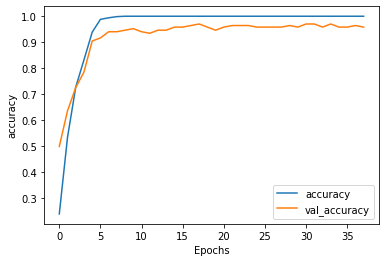

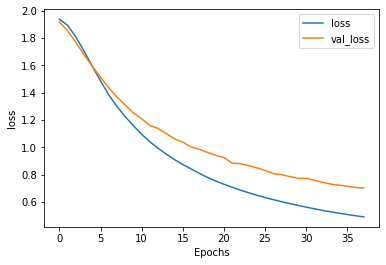

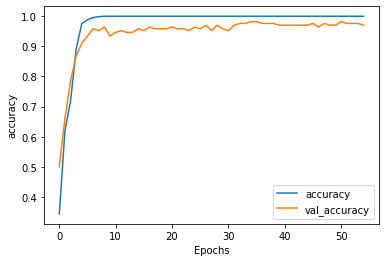

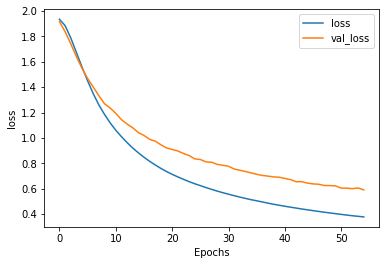

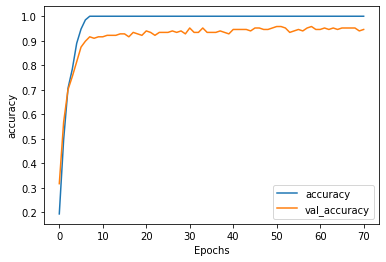

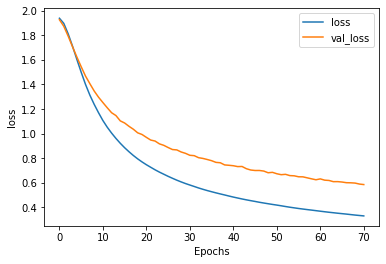

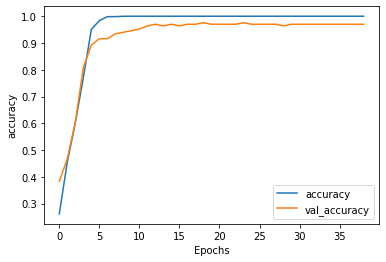

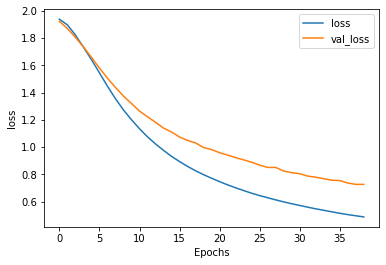

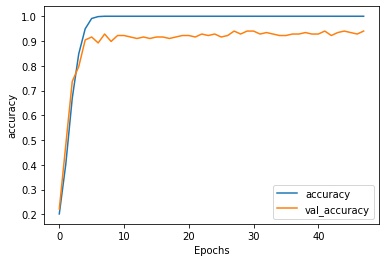

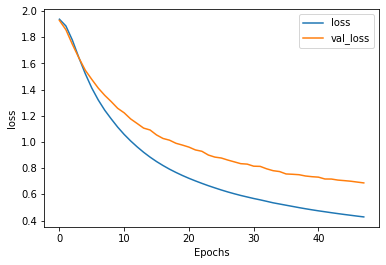

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(Models_and_Histories['history'][0], "accuracy")
plot_graphs(Models_and_Histories['history'][0], "loss")

plot_graphs(Models_and_Histories['history'][1], "accuracy")
plot_graphs(Models_and_Histories['history'][1], "loss")

  
plot_graphs(Models_and_Histories['history'][2], "accuracy")
plot_graphs(Models_and_Histories['history'][2], "loss")

plot_graphs(Models_and_Histories['history'][3], "accuracy")
plot_graphs(Models_and_Histories['history'][3], "loss")

plot_graphs(Models_and_Histories['history'][4], "accuracy")
plot_graphs(Models_and_Histories['history'][4], "loss")


In [ ]:
# layer=model.layers[2]
# weight=layer.get_weights()
# a=layer.get_config()
# layer.set_weights(weight)



**Save Models**

In [ ]:
# Save the model
Models_and_Histories['model'][0].save('/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Models/my_model_fold1.h5')
Models_and_Histories['model'][1].save('/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Models/my_model_fold2.h5')
Models_and_Histories['model'][2].save('/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Models/my_model_fold3.h5')
Models_and_Histories['model'][3].save('/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Models/my_model_fold4.h5')
Models_and_Histories['model'][4].save('/content/gdrive/My Drive/Colab Notebooks/Final_Codes/Save_Models/my_model_fold5.h5')


**Load Models**

In [ ]:
# Recreate the exact same model purely from the file

new_model1=tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/OCR_TESSERACT/Text Extraction/Last_Code_7_Classes_Saved_Models/Save_0950939models/my_model_fold1.h5')
new_model2=tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/OCR_TESSERACT/Text Extraction/Last_Code_7_Classes_Saved_Models/Save_0950939models/my_model_fold2.h5')
new_model3=tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/OCR_TESSERACT/Text Extraction/Last_Code_7_Classes_Saved_Models/Save_0950939models/my_model_fold3.h5')
new_model4=tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/OCR_TESSERACT/Text Extraction/Last_Code_7_Classes_Saved_Models/Save_0950939models/my_model_fold4.h5')
new_model5=tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/OCR_TESSERACT/Text Extraction/Last_Code_7_Classes_Saved_Models/Save_0950939models/my_model_fold5.h5')
  
#new_model=(new_model1+new_model2+new_model3+new_model4+new_model5)/5

In [ ]:
(new_model.weights[0])

<tf.Variable 'embedding_3_2/embeddings:0' shape=(30000, 110) dtype=float32, numpy=
array([[-0.0181458 ,  0.00126015,  0.04551448, ..., -0.03209709,
        -0.03215776,  0.03180012],
       [ 0.06702489,  0.08977326,  0.10545082, ...,  0.04370687,
         0.0803242 , -0.03964601],
       [ 0.05711764,  0.02955428,  0.08644729, ..., -0.05263382,
        -0.05155922,  0.03970198],
       ...,
       [-0.03009835, -0.03781892,  0.01352146, ..., -0.01469067,
        -0.01983069,  0.01353201],
       [ 0.01664987,  0.0061983 , -0.00028289, ...,  0.01903727,
        -0.00688913, -0.0029732 ],
       [-0.0083886 , -0.02586279,  0.02792798, ..., -0.0187257 ,
        -0.00423697,  0.031344  ]], dtype=float32)>

In [ ]:
print(new_model1.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
print()
print(new_model2.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
print()
print(new_model3.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
print()
print(new_model4.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
print()
print(new_model5.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))

2/2 [==============================] - 0s 4ms/step - loss: 0.8798 - accuracy: 0.9048
[0.8798344135284424, 0.9047619104385376]

2/2 [==============================] - 0s 4ms/step - loss: 1.4976 - accuracy: 0.9206
[1.4975619316101074, 0.920634925365448]

2/2 [==============================] - 0s 4ms/step - loss: 0.9726 - accuracy: 0.9524
[0.9725565910339355, 0.9523809552192688]

2/2 [==============================] - 0s 4ms/step - loss: 1.1728 - accuracy: 0.9524
[1.172829031944275, 0.9523809552192688]

2/2 [==============================] - 0s 4ms/step - loss: 1.6598 - accuracy: 0.9683
[1.6598355770111084, 0.9682539701461792]


In [ ]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#   word = index_word[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

**Confusion Matrix for Model1**

In [ ]:
y_pred=new_model1.predict_classes(control_test_sentences_padded)


con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=y_pred).numpy()

print(con_mat)

print()

print((control_test_labels))
print(y_pred)                                      #aij-should be i, but model predicts j (i,j=0;1...)



[[ 8  0  0  0  0  0  0]
 [ 1 11  0  0  0  0  0]
 [ 0  0  6  0  1  0  0]
 [ 0  0  0  8  1  0  0]
 [ 0  0  1  0  5  0  0]
 [ 0  0  0  0  1  9  0]
 [ 0  0  0  0  1  0 10]]

[3 5 0 6 1 6 0 0 2 0 1 5 3 3 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 5 0 4 1 1 6 6 1 6 6 6 5 0]
[3 5 0 6 1 6 0 0 2 0 1 5 4 3 5 3 5 3 5 2 5 5 3 1 4 0 4 3 5 6 3 1 2 6 1 0 0
 3 4 2 2 1 1 2 1 4 4 2 6 4 4 0 4 1 1 6 6 1 6 6 6 5 0]


**Confusion Matrix for Model2**

In [ ]:
y_pred=new_model2.predict_classes(control_test_sentences_padded)


con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=y_pred).numpy()

print(con_mat)

print()

print((control_test_labels))
print(y_pred)                                       #aij-should be i, but model predicts j (i,j=0;1...)

[[ 8  0  0  0  0  0  0]
 [ 0 11  0  0  1  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  1  7  0  0  1]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  1  9  0]
 [ 0  0  0  0  1  0 10]]

[3 5 0 6 1 6 0 0 2 0 1 5 3 3 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 5 0 4 1 1 6 6 1 6 6 6 5 0]
[3 5 0 6 1 6 0 0 2 0 1 5 6 2 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 4
 3 4 2 2 1 1 2 1 4 4 2 6 4 4 0 4 1 1 6 6 1 6 6 6 5 0]


**Confusion Matrix for Model3**

In [ ]:
y_pred=new_model3.predict_classes(control_test_sentences_padded)


con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=y_pred).numpy()

print(con_mat)

print()

print((control_test_labels))
print(y_pred)                             #aij-should be i, but model predicts j (i,j=0;1...)

[[ 8  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  8  0  0  1]
 [ 0  1  0  0  5  0  0]
 [ 0  0  0  0  1  9  0]
 [ 0  0  0  0  0  0 11]]

[3 5 0 6 1 6 0 0 2 0 1 5 3 3 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 5 0 4 1 1 6 6 1 6 6 6 5 0]
[3 5 0 6 1 6 0 0 2 0 1 5 6 3 5 3 5 3 5 1 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 4 0 4 1 1 6 6 1 6 6 6 5 0]


**Confusion Matrix for Model4**

In [ ]:
y_pred=new_model4.predict_classes(control_test_sentences_padded)


con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=y_pred).numpy()

print(con_mat)

print()

print((control_test_labels))
print(y_pred)                    #aij-should be i, but model predicts j (i,j=0;1...)

[[ 8  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  1  8  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  1  0  1  8  0]
 [ 0  0  0  0  0  0 11]]

[3 5 0 6 1 6 0 0 2 0 1 5 3 3 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 5 0 4 1 1 6 6 1 6 6 6 5 0]
[3 5 0 6 1 6 0 0 2 0 1 5 2 3 5 3 5 3 5 4 5 2 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 4 0 4 1 1 6 6 1 6 6 6 5 0]


**Confusion Matrix for Model5**

In [ ]:
y_pred=new_model5.predict_classes(control_test_sentences_padded)


con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=y_pred).numpy()

print(con_mat)

print()

print((control_test_labels))
print(y_pred)                          #aij-should be i, but model predicts j (i,j=0;1...)

[[ 8  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  1]
 [ 0  0  7  0  0  0  0]
 [ 1  0  0  8  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0 11]]

[3 5 0 6 1 6 0 0 2 0 1 5 3 3 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 1
 3 4 2 2 1 1 2 1 6 4 2 6 4 5 0 4 1 1 6 6 1 6 6 6 5 0]
[3 5 0 6 1 6 0 0 2 0 1 5 0 3 5 3 5 3 5 4 5 5 3 1 2 0 4 3 5 6 3 1 2 6 1 0 6
 3 4 2 2 1 1 2 1 6 4 2 6 4 5 0 4 1 1 6 6 1 6 6 6 5 0]
